In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import os

In [2]:
%store -r workload_collections workload_collections2

In [3]:
df = workload_collections.merge(workload_collections2['Comm Aircraft Pax/Crew combined (ECAR)'], 
                                left_index = True, right_index = True)

In [4]:
df = df[['Comm Aircraft Pax/Crew combined (ECAR)', 'USC00011: Commercial Aircraft Pax',
       'MPP00013: Private Aircraft Passengers',
       'USCP0011: Preclear Air Ports Pax/Crew combined (Calc)',
       'Sum of Workload Ids', 'Collections', 'Remittance Period',
       'Calendar Year']]

In [5]:
df.drop('Qtr 03 (Jul-Sept) 2018', axis = 0,inplace = True)

In [6]:
df

,Comm Aircraft Pax/Crew combined (ECAR),USC00011: Commercial Aircraft Pax,MPP00013: Private Aircraft Passengers,USCP0011: Preclear Air Ports Pax/Crew combined (Calc),Sum of Workload Ids,Collections,Remittance Period,Calendar Year
Qtr 01 (Jan-Mar) 2013,19922659.0,18700855.0,83857.0,4006973.0,22791685.0,1.446142e+08,Qtr 01 (Jan-Mar),2013
Qtr 01 (Jan-Mar) 2014,20465041.0,19219847.0,83617.0,4162697.0,23466161.0,1.519669e+08,Qtr 01 (Jan-Mar),2014
Qtr 01 (Jan-Mar) 2015,21503062.0,20244415.0,83705.0,4519727.0,24847847.0,1.626936e+08,Qtr 01 (Jan-Mar),2015
Qtr 01 (Jan-Mar) 2016,23208448.0,21847254.0,84635.0,4635919.0,26567808.0,1.683570e+08,Qtr 01 (Jan-Mar),2016
Qtr 01 (Jan-Mar) 2017,23782842.0,22369440.0,77939.0,4762410.0,27209789.0,1.820994e+08,Qtr 01 (Jan-Mar),2017
Qtr 01 (Jan-Mar) 2018,25067750.0,23622048.0,79255.0,4980962.0,28682265.0,1.993085e+08,Qtr 01 (Jan-Mar),2018
Qtr 02 (Apr-Jun) 2013,21933564.0,20632109.0,81847.0,3941004.0,24654960.0,1.369273e+08,Qtr 02 (Apr-Jun),2013
Qtr 02 (Apr-Jun) 2014,23136714.0,21778636.0,84433.0,4376274.0,26239343.0,1.428367e+08,Qtr 02 (Apr-Jun),2014
Qtr 02 (Apr-Jun) 2015,24050999.0,22657474.0,82242.0,4615960.0,27355676.0,1.545880e+08,Qtr 02 (Apr-Jun),2015
Qtr 02 (Apr-Jun) 2016,25184172.0,23744750.0,80985.0,4720735.0,28546470.0,1.629744e+08,Qtr 02 (Apr-Jun),2016


In [7]:
df.corr()

,Comm Aircraft Pax/Crew combined (ECAR),USC00011: Commercial Aircraft Pax,MPP00013: Private Aircraft Passengers,USCP0011: Preclear Air Ports Pax/Crew combined (Calc),Sum of Workload Ids,Collections,Calendar Year
Comm Aircraft Pax/Crew combined (ECAR),1.000000,0.999675,-0.180876,0.936792,0.998533,0.476765,0.681053
USC00011: Commercial Aircraft Pax,0.999675,1.000000,-0.174143,0.935659,0.998655,0.468817,0.672248
MPP00013: Private Aircraft Passengers,-0.180876,-0.174143,1.000000,-0.225511,-0.181685,0.172454,-0.307975
USCP0011: Preclear Air Ports Pax/Crew combined (Calc),0.936792,0.935659,-0.225511,1.000000,0.952689,0.612512,0.835476
Sum of Workload Ids,0.998533,0.998655,-0.181685,0.952689,1.000000,0.494231,0.701534
Collections,0.476765,0.468817,0.172454,0.612512,0.494231,1.000000,0.831634
Calendar Year,0.681053,0.672248,-0.307975,0.835476,0.701534,0.831634,1.000000


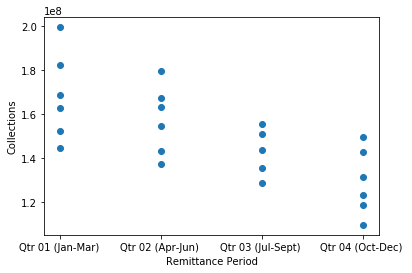

In [8]:
plt.scatter(df['Remittance Period'],df['Collections'])    
plt.xlabel('Remittance Period')
plt.ylabel('Collections')
plt.show()

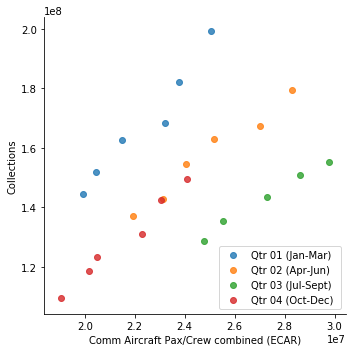

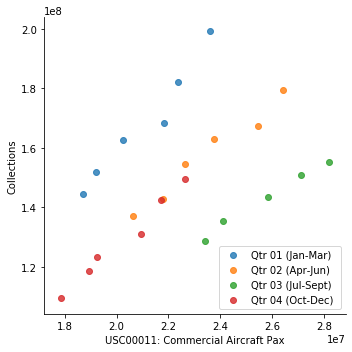

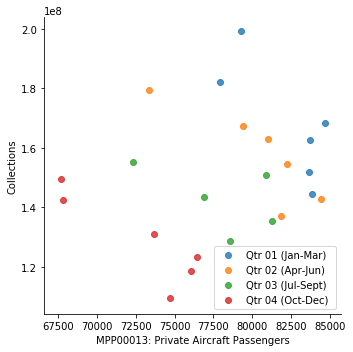

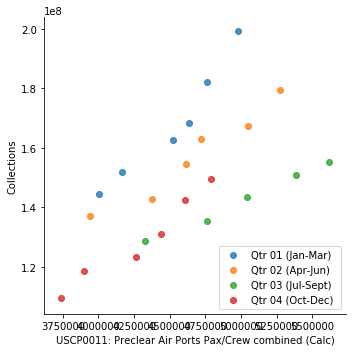

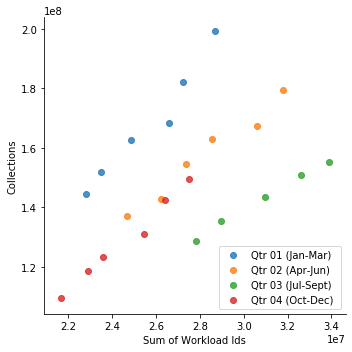

In [9]:
for i in range(len(df.columns)-3):
    
    # Use the 'hue' argument to provide a factor variable
    sns.lmplot(x= df.columns[i], y = 'Collections', data = df, fit_reg=False, hue='Remittance Period', legend=False)

    # Move the legend to an empty part of the plot
    plt.legend(loc='lower right')
    plt.xlabel(df.columns[i])
    plt.ylabel('Collections')
    plt.show()

In [10]:
df.corr()

,Comm Aircraft Pax/Crew combined (ECAR),USC00011: Commercial Aircraft Pax,MPP00013: Private Aircraft Passengers,USCP0011: Preclear Air Ports Pax/Crew combined (Calc),Sum of Workload Ids,Collections,Calendar Year
Comm Aircraft Pax/Crew combined (ECAR),1.000000,0.999675,-0.180876,0.936792,0.998533,0.476765,0.681053
USC00011: Commercial Aircraft Pax,0.999675,1.000000,-0.174143,0.935659,0.998655,0.468817,0.672248
MPP00013: Private Aircraft Passengers,-0.180876,-0.174143,1.000000,-0.225511,-0.181685,0.172454,-0.307975
USCP0011: Preclear Air Ports Pax/Crew combined (Calc),0.936792,0.935659,-0.225511,1.000000,0.952689,0.612512,0.835476
Sum of Workload Ids,0.998533,0.998655,-0.181685,0.952689,1.000000,0.494231,0.701534
Collections,0.476765,0.468817,0.172454,0.612512,0.494231,1.000000,0.831634
Calendar Year,0.681053,0.672248,-0.307975,0.835476,0.701534,0.831634,1.000000


In [11]:
df.columns

Index(['Comm Aircraft Pax/Crew combined (ECAR)',
       'USC00011: Commercial Aircraft Pax',
       'MPP00013: Private Aircraft Passengers',
       'USCP0011: Preclear Air Ports Pax/Crew combined (Calc)',
       'Sum of Workload Ids', 'Collections', 'Remittance Period',
       'Calendar Year'],
      dtype='object')

In [12]:
df['Workload'] = df['Sum of Workload Ids']
df['Fee'] = 'COBRA'
df ['Environment'] = 'Air'
df.drop(columns = ['Comm Aircraft Pax/Crew combined (ECAR)',
       'USC00011: Commercial Aircraft Pax',
       'MPP00013: Private Aircraft Passengers',
       'USCP0011: Preclear Air Ports Pax/Crew combined (Calc)',
       'Sum of Workload Ids'], axis = 1, inplace = True)

In [13]:
# run linear regression on workload and collections to get linear coefficent. 
X = df['Workload']
X = sm.add_constant(X)
model = sm.OLS(df['Collections'],X)
results = model.fit()

C:\Users\belincoln\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
# this is the linear coefficent
collection_per_workload = results.params.iloc[1]
const = results.params.iloc[0]
# Multiply linear coefficent with workload to graph a line of best fit. 
df['Expected Collections'] = collection_per_workload * workload_collections.iloc[:,0]
# Add regression coefficent and R^2 values for Power BI notecards
df['Regression Coefficent'] = results.params.iloc[1]
df['R^2'] = results.rsquared

In [15]:
# add coefficents and constants for confidence interval mapping
df['lower conf_int constant'] = results.conf_int(alpha=.05, cols= None).iloc[0,0]
df['lower conf_int coefficent'] = results.conf_int(alpha=.05, cols= None).iloc[1,0]

In [16]:
# add coefficents and constants for confidence interval mapping
df['lower conf_int constant'] = results.conf_int(alpha=.05, cols= None).iloc[0,0]
df['lower conf_int coefficent'] = results.conf_int(alpha=.05, cols= None).iloc[1,0]

df['upper conf_int constant'] = results.conf_int(alpha=.05, cols= None).iloc[0,1]
df['upper conf_int coefficent'] = results.conf_int(alpha=.05, cols= None).iloc[1,1]

In [17]:
df

,Collections,Remittance Period,Calendar Year,Workload,Fee,Environment,Expected Collections,Regression Coefficent,R^2,lower conf_int constant,lower conf_int coefficent,upper conf_int constant,upper conf_int coefficent
Qtr 01 (Jan-Mar) 2013,1.446142e+08,Qtr 01 (Jan-Mar),2013,22791685.0,COBRA,Air,5.975928e+07,3.195537,0.244265,-6.906979e+06,0.644765,1.325909e+08,5.74631
Qtr 01 (Jan-Mar) 2014,1.519669e+08,Qtr 01 (Jan-Mar),2014,23466161.0,COBRA,Air,6.141774e+07,3.195537,0.244265,-6.906979e+06,0.644765,1.325909e+08,5.74631
Qtr 01 (Jan-Mar) 2015,1.626936e+08,Qtr 01 (Jan-Mar),2015,24847847.0,COBRA,Air,6.469179e+07,3.195537,0.244265,-6.906979e+06,0.644765,1.325909e+08,5.74631
Qtr 01 (Jan-Mar) 2016,1.683570e+08,Qtr 01 (Jan-Mar),2016,26567808.0,COBRA,Air,6.981372e+07,3.195537,0.244265,-6.906979e+06,0.644765,1.325909e+08,5.74631
Qtr 01 (Jan-Mar) 2017,1.820994e+08,Qtr 01 (Jan-Mar),2017,27209789.0,COBRA,Air,7.148238e+07,3.195537,0.244265,-6.906979e+06,0.644765,1.325909e+08,5.74631
Qtr 01 (Jan-Mar) 2018,1.993085e+08,Qtr 01 (Jan-Mar),2018,28682265.0,COBRA,Air,7.548514e+07,3.195537,0.244265,-6.906979e+06,0.644765,1.325909e+08,5.74631
Qtr 02 (Apr-Jun) 2013,1.369273e+08,Qtr 02 (Apr-Jun),2013,24654960.0,COBRA,Air,6.593068e+07,3.195537,0.244265,-6.906979e+06,0.644765,1.325909e+08,5.74631
Qtr 02 (Apr-Jun) 2014,1.428367e+08,Qtr 02 (Apr-Jun),2014,26239343.0,COBRA,Air,6.959445e+07,3.195537,0.244265,-6.906979e+06,0.644765,1.325909e+08,5.74631
Qtr 02 (Apr-Jun) 2015,1.545880e+08,Qtr 02 (Apr-Jun),2015,27355676.0,COBRA,Air,7.240281e+07,3.195537,0.244265,-6.906979e+06,0.644765,1.325909e+08,5.74631
Qtr 02 (Apr-Jun) 2016,1.629744e+08,Qtr 02 (Apr-Jun),2016,28546470.0,COBRA,Air,7.587724e+07,3.195537,0.244265,-6.906979e+06,0.644765,1.325909e+08,5.74631


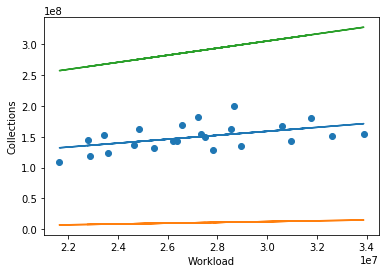

In [18]:
# Show final Scatter Plot with Line of best fit. 
plt.scatter(df.loc[:,'Workload'], df.loc[:,'Collections'])
plt.xlabel('Workload')
plt.ylabel('Collections')
plt.plot(df.loc[:,'Workload'], const + collection_per_workload * df.loc[:,'Workload'])
plt.plot(df.loc[:,'Workload'], df['lower conf_int constant'][0] + df['lower conf_int coefficent'][0]*df.loc[:,'Workload'])
plt.plot(df.loc[:,'Workload'], df['upper conf_int constant'][0] + df['upper conf_int coefficent'][0]*df.loc[:,'Workload'])
plt.show()

In [40]:
df.columns

Index(['Collections', 'Remittance Period', 'Calendar Year', 'Workload', 'Fee',
       'Environment', 'Expected Collections', 'Regression Coefficent', 'R^2',
       'lower conf_int constant', 'lower conf_int coefficent',
       'upper conf_int constant', 'upper conf_int coefficent'],
      dtype='object')

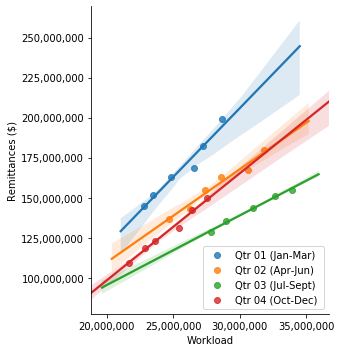

In [53]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot(x= 'Workload' , y = 'Collections', data = df, fit_reg = True,
           hue='Remittance Period', legend=False)
#plt.plot(df['Workload'], 
#         df['lower conf_int constant'][0] + df['lower conf_int coefficent'][0]*df['Workload'], 
#         color = 'm', label = 'Confidence Interval Boundary')
#plt.plot(df['Workload'], 
#         df['upper conf_int constant'][0] + df['upper conf_int coefficent'][0]*df['Workload'], color = 'm')
#legend, control transparency of legend
plt.legend(loc = 'upper left', fancybox = True, framealpha = .9)

# Eliminate scientific notation from Axis
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

# Add commas to the y Axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) 
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) 
#sns.lineplot(x = 'Workload', y = 'lower conf_int constant' + 'Workload' * 'lower conf_int coefficent', data = df )
plt.draw()
plt.tight_layout()

# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.xlabel('Workload')
plt.ylabel('Remittances ($)')
plt.show()

In [19]:
%pwd

'C:\\Users\\belincoln\\repos\\MSD_UserFees\\COBRA notebooks\\Analysis'

In [20]:
# Write Power BI df to csv for visualization
os.chdir('C:\\Users\\belincoln\\Documents\\! CBP\\!User Fees\\!! Goal 1 Dashboards')
df.to_csv(os.path.join('Power_BI_Data_Files','495_COBRA_Air_Workload_Collections_Period.csv'))